# AIML

This notebook contains different neural networks implemented in TF2.0

In [23]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

import tensorflow as tf
tf.__version__

'2.0.0-beta1'

# Regression

**Step1: Import modules and data**

In [24]:
import numpy as np

import tensorflow as tf
tf.random.set_seed=123

import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.datasets import load_boston
from sklearn.preprocessing import scale

features, prices = load_boston(True)

**Step2: Preprocessing**

In [25]:
# Split into train and test
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(features, prices, test_size=0.2)

# split train set into validation and leave test as unseen data
x_train, x_valid, y_train, y_valid = train_test_split(x_train, y_train, test_size=0.2)

In [26]:
# Preprocess and transform data
x_train = tf.cast(scale(x_train), dtype=tf.float32)
x_test = tf.cast(scale(x_test), dtype=tf.float32)
x_valid = tf.cast(scale(x_valid), dtype=tf.float32)

**Step3: Build Regression model**

In [27]:
# Define hyper parameters
learning_rate = 0.001
epochs = 5

# Initialize random values for weight and bias
W = tf.Variable(tf.random.normal([13,1], mean=0.0, stddev=1.0, dtype=tf.float32))
B = tf.Variable(tf.zeros(1), dtype=tf.float32)

In [28]:
# Define a prediction function
def predict(x, weights, bias):
    return tf.reduce_sum(tf.matmul(x, weights), axis=1, keepdims=True) + bias 

In [29]:
# Define a loss function 
def rmse(x, y, weights, bias):
    error = predict(x, weights, bias) - y
    squared_error = tf.square(error)
    return tf.sqrt(tf.reduce_mean(squared_error))

In [30]:
# Define derivate or optimizer
def gradient(x, y, weights, bias):
    with tf.GradientTape() as tape:
        rmse_value = rmse(x, y, weights, bias)
    return tape.gradient(rmse_value, [weights, bias])

In [31]:
# Let's find out best parameter with Gradient
for epoch in range(epochs):
    w_delta, b_delta = gradient(x_train, y_train, W, B)
    change_w = w_delta*learning_rate
    change_b = b_delta*learning_rate
    W.assign_sub(change_w)
    B.assign_sub(change_b)
    if (epoch%1000)==0:
        print(f"Validation loss after Epoch-{epoch}: {rmse(x_valid, y_valid, W, B)}")

<tf.Variable 'UnreadVariable' shape=(13, 1) dtype=float32, numpy=
array([[-1.7576448 ],
       [ 0.05011108],
       [-1.7047981 ],
       [-1.110106  ],
       [ 2.5383947 ],
       [ 0.6725887 ],
       [ 0.40312243],
       [-0.28553987],
       [-1.2967421 ],
       [ 0.53705275],
       [ 0.12129647],
       [ 0.08437369],
       [-2.5319936 ]], dtype=float32)>

<tf.Variable 'UnreadVariable' shape=(1,) dtype=float32, numpy=array([0.00091354], dtype=float32)>

Validation loss after Epoch-0: 26.043630599975586


<tf.Variable 'UnreadVariable' shape=(13, 1) dtype=float32, numpy=
array([[-1.7575215 ],
       [ 0.05006592],
       [-1.7047026 ],
       [-1.1100821 ],
       [ 2.5384498 ],
       [ 0.6724848 ],
       [ 0.40318272],
       [-0.28559545],
       [-1.296643  ],
       [ 0.5371505 ],
       [ 0.12136154],
       [ 0.08430595],
       [-2.5318613 ]], dtype=float32)>

<tf.Variable 'UnreadVariable' shape=(1,) dtype=float32, numpy=array([0.00182708], dtype=float32)>

<tf.Variable 'UnreadVariable' shape=(13, 1) dtype=float32, numpy=
array([[-1.7573982 ],
       [ 0.05002078],
       [-1.7046071 ],
       [-1.1100583 ],
       [ 2.5385048 ],
       [ 0.6723809 ],
       [ 0.403243  ],
       [-0.285651  ],
       [-1.296544  ],
       [ 0.5372482 ],
       [ 0.1214266 ],
       [ 0.08423822],
       [-2.531729  ]], dtype=float32)>

<tf.Variable 'UnreadVariable' shape=(1,) dtype=float32, numpy=array([0.00274062], dtype=float32)>

<tf.Variable 'UnreadVariable' shape=(13, 1) dtype=float32, numpy=
array([[-1.7572751 ],
       [ 0.04997565],
       [-1.7045116 ],
       [-1.1100345 ],
       [ 2.53856   ],
       [ 0.67227703],
       [ 0.40330327],
       [-0.28570652],
       [-1.2964449 ],
       [ 0.5373459 ],
       [ 0.12149166],
       [ 0.08417051],
       [-2.5315967 ]], dtype=float32)>

<tf.Variable 'UnreadVariable' shape=(1,) dtype=float32, numpy=array([0.00365415], dtype=float32)>

<tf.Variable 'UnreadVariable' shape=(13, 1) dtype=float32, numpy=
array([[-1.757152  ],
       [ 0.04993054],
       [-1.7044162 ],
       [-1.1100106 ],
       [ 2.538615  ],
       [ 0.6721732 ],
       [ 0.4033635 ],
       [-0.28576204],
       [-1.296346  ],
       [ 0.5374436 ],
       [ 0.12155669],
       [ 0.0841028 ],
       [-2.5314643 ]], dtype=float32)>

<tf.Variable 'UnreadVariable' shape=(1,) dtype=float32, numpy=array([0.00456769], dtype=float32)>

In [32]:
# Let's make prediction on test dataset
y_pred = predict(x_test, W, B)
print("Model prediction: ", y_pred[45].numpy())
print("Actual prediction: ", y_test[45])

Model prediction:  [-1.8954488]
Actual prediction:  16.1


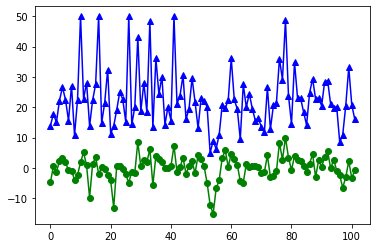

In [33]:
# Plot outputs
plt.plot(y_test, color='b', marker='^')
plt.plot(y_pred, color='g', marker='o')
plt.show()

# Artificial Neural Networks

**Step 1: Import required Modules and dataset**


(60000, 28, 28)

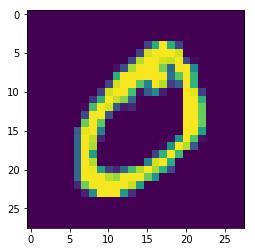

In [3]:
import numpy as np
import datetime

import matplotlib.pyplot as plt
%matplotlib inline

import tensorflow as tf
#tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.INFO)

from tensorflow.keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train.shape

# Plot an image
plt.imshow(x_train[1])

**Step 2: Preprocessing - Normalize and reshape images**

In [4]:
# Normalize
x_train = x_train/255.0
x_test = x_test/255.0

# Reshape
x_train = x_train.reshape(-1, 28*28)
x_test = x_test.reshape(-1, 28*28)

x_train.shape

(60000, 784)

**Step 3: Build, Evalualte and Predict ANN**

In [5]:
# Define a model
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(units=128, activation='relu', input_shape=(784,)))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(units=10, activation='softmax'))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['sparse_categorical_accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [6]:
# Define callback
#class myCallback(tf.keras.callbacks.Callback):
#  def on_epoch_end(self, epoch, logs={}):
#    if (logs.get('acc')>0.97):
#      print('Reached accuracy, cancelling training')
#      self.model.stop_training=True

# Train model
model.fit(x_train, 
          y_train, 
          epochs=5, 
          batch_size=128, 
          #callbacks=[ myCallback() ]
         )

W0625 04:50:32.669970 140568180594560 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 15s 249us/sample - loss: 0.2576 - sparse_categorical_accuracy: 0.9242
Epoch 2/5
60000/60000 [==============================] - 15s 249us/sample - loss: 0.1317 - sparse_categorical_accuracy: 0.9597
Epoch 3/5
60000/60000 [==============================] - 15s 248us/sample - loss: 0.1020 - sparse_categorical_accuracy: 0.9685
Epoch 4/5
60000/60000 [==============================] - 13s 221us/sample - loss: 0.0848 - sparse_categorical_accuracy: 0.9738
Epoch 5/5
60000/60000 [==============================] - 13s 214us/sample - loss: 0.0756 - sparse_categorical_accuracy: 0.9766


In [7]:
# Evaluate model
model.evaluate(x_test, y_test)

10000/10000 [==============================] - 0s 50us/sample - loss: 0.0756 - sparse_categorical_accuracy: 0.9781


[0.07560164894249756, 0.9781]

In [12]:
# Make prediction
model.predict_classes(x_test[:5])

array([7, 2, 1, 0, 4])

# Convolutional Neural Networks

**Step 1: Import modules and dataset**

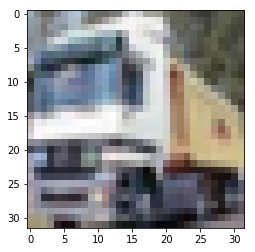

In [19]:
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline

from tensorflow.keras.datasets import cifar10

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

plt.imshow(x_train[1])

**Step 2: Preprocessing - Normalization**

In [20]:
class_name = ['airplanes', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

x_train = x_train/255.0
x_test = x_test/255.0

x_train.shape


(50000, 32, 32, 3)

**Step 3: Build, Evaluate, Predict CNN**

In [23]:
# Define model
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, padding='same', activation='relu', input_shape=[32,32,3]))
model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, padding='same', activation='relu'))
model.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2, padding='valid'))
model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'))
model.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2, padding='valid'))
model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'))
model.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2, padding='valid'))
model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'))
model.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2, padding='valid'))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(units=128, activation='relu'))
model.add(tf.keras.layers.Dense(units=10, activation='softmax'))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['sparse_categorical_accuracy'])
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 8, 8, 64)          36928     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 4, 4, 64)         

In [45]:
# Train model
model.fit(x_train, y_train, epochs=5, batch_size=128)

Train on 50000 samples
Epoch 1/5
50000/50000 [==============================] - 200s 4ms/sample - loss: 0.4542 - sparse_categorical_accuracy: 0.8410
Epoch 2/5
50000/50000 [==============================] - 200s 4ms/sample - loss: 0.4076 - sparse_categorical_accuracy: 0.8559
Epoch 3/5
50000/50000 [==============================] - 201s 4ms/sample - loss: 0.3814 - sparse_categorical_accuracy: 0.8656
Epoch 4/5
50000/50000 [==============================] - 201s 4ms/sample - loss: 0.3466 - sparse_categorical_accuracy: 0.8770
Epoch 5/5
50000/50000 [==============================] - 201s 4ms/sample - loss: 0.3131 - sparse_categorical_accuracy: 0.8896


In [27]:
# Evaluate model
model.evaluate(x_test, y_test)

10000/10000 [==============================] - 12s 1ms/sample - loss: 0.7801 - sparse_categorical_accuracy: 0.7345


[0.7800624543190002, 0.7345]

In [44]:
# Predict sample 
model.predict_classes(np.expand_dims(x_test[0], axis=0))

array([3])

# Recurrent Neural Networks

**Step1: Import modules and dataset**

In [58]:
import tensorflow as tf
from tensorflow.keras.datasets import imdb

nb_of_words = 20000
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=nb_of_words)

x_train.shape
x_train[:1]

(25000,)

array([list([1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 19193, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 10311, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 12118, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32])],
      dtype=object)

**Step2: Preprocessing**

In [59]:
# Define dataset parameters
max_len = 100

# Padd sequences to make same length
x_train = tf.keras.preprocessing.sequence.pad_sequences(x_train, maxlen=max_len)
x_test = tf.keras.preprocessing.sequence.pad_sequences(x_test, maxlen=max_len)

x_train[1]

array([  163,    11,  3215, 10156,     4,  1153,     9,   194,   775,
           7,  8255, 11596,   349,  2637,   148,   605, 15358,  8003,
          15,   123,   125,    68,     2,  6853,    15,   349,   165,
        4362,    98,     5,     4,   228,     9,    43,     2,  1157,
          15,   299,   120,     5,   120,   174,    11,   220,   175,
         136,    50,     9,  4373,   228,  8255,     5,     2,   656,
         245,  2350,     5,     4,  9837,   131,   152,   491,    18,
           2,    32,  7464,  1212,    14,     9,     6,   371,    78,
          22,   625,    64,  1382,     9,     8,   168,   145,    23,
           4,  1690,    15,    16,     4,  1355,     5,    28,     6,
          52,   154,   462,    33,    89,    78,   285,    16,   145,
          95], dtype=int32)

**Step3: Build RNN**

In [60]:
# Define model
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Embedding(input_dim=nb_of_words, output_dim=128, input_shape=(x_train.shape[1],)))
model.add(tf.keras.layers.LSTM(units=128, activation='tanh'))
model.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 100, 128)          2560000   
_________________________________________________________________
lstm (LSTM)                  (None, 128)               131584    
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 129       
Total params: 2,691,713
Trainable params: 2,691,713
Non-trainable params: 0
_________________________________________________________________


In [61]:
# Train model
model.fit(x_train, y_train, epochs=1, batch_size=128)

Train on 25000 samples
25000/25000 [==============================] - 173s 7ms/sample - loss: 0.4203 - accuracy: 0.8143


In [63]:
# Evalulate model
model.evaluate(x_test, y_test)

25000/25000 [==============================] - 67s 3ms/sample - loss: 0.5048 - accuracy: 0.8198


[0.5048235824823379, 0.81984]

In [66]:
# Predict result
model.predict_classes(x_test[:1])

array([[1]], dtype=int32)

# Transfer Learning

**Step1: Import modules and datasets**

In [12]:
# Go to Edit -> Notebook Settings -> hardware acceleartor and select GPU
import tensorflow as tf
print(tf.__version__)
tf.test.is_gpu_available()

from tqdm import tqdm_notebook
import os
import zipfile
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.preprocessing.image import ImageDataGenerator

2.0.0-beta1


In [2]:
# Download dataset
!wget --no-check-certificate \
      https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip \
      -O ./cats_and_dogs_filtered.zip

--2019-06-25 19:34:26--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.129.128, 2607:f8b0:4001:c1d::80
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.129.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘./cats_and_dogs_filtered.zip’

./cats_and_dogs_fil 100%[===================>]  65.43M   172MB/s    in 0.4s    

2019-06-25 19:34:27 (172 MB/s) - ‘./cats_and_dogs_filtered.zip’ saved [68606236/68606236]



In [0]:
# Extract dataset
zip_path = './cats_and_dogs_filtered.zip'
zip_object = zipfile.ZipFile(zip_path, 'r')
zip_object.extractall('./')
zip_object.close()

# Delete zip file
os.remove(zip_path)

In [0]:
# Test and train 
dataset_path = './cats_and_dogs_filtered/'
train_dir = os.path.join(dataset_path, "train")
validation_dir = os.path.join(dataset_path, "validation")

**Step2: Preprocessing**

In [34]:
IMG_SHAPE=[128,128,3]

# Create data generator
train_gen = ImageDataGenerator(rescale=1/255.)
valid_gen = ImageDataGenerator(rescale=1/255.)

train_gen = train_gen.flow_from_directory(train_dir,
                                                    target_size=(128,128),
                                                    batch_size=128,
                                                    class_mode='binary')

valid_gen = valid_gen.flow_from_directory(validation_dir,
                                                    target_size=(128,128),
                                                    batch_size=128,
                                                    class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


**Step3: Apply Transfer learning and build model on top**

In [13]:
# Load pretrained base model -  MobileNetV2
base_model = tf.keras.applications.MobileNetV2(input_shape=IMG_SHAPE, 
                                               include_top=False,
                                              weights='imagenet')

base_model.summary()

Model: "mobilenetv2_1.00_128"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 128, 128, 3) 0                                            
__________________________________________________________________________________________________
Conv1_pad (ZeroPadding2D)       (None, 129, 129, 3)  0           input_2[0][0]                    
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 64, 64, 32)   864         Conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 64, 64, 32)   128         Conv1[0][0]                      
_______________________________________________________________________________

In [14]:
# Freezing base model
base_model.trainable = False

base_model.output

<tf.Tensor 'out_relu_1/Identity:0' shape=(None, 4, 4, 1280) dtype=float32>

In [21]:
# Define custom head for network
global_average_layer = tf.keras.layers.GlobalAveragePooling2D()(base_model.output)
global_average_layer

<tf.Tensor 'global_average_pooling2d_8/Identity:0' shape=(None, 1280) dtype=float32>

In [0]:
# Prediction layer
prediction_layer = tf.keras.layers.Dense(units=1, activation='sigmoid')(global_average_layer)

In [27]:
# Define model
model = tf.keras.models.Model(inputs=base_model.input, outputs=prediction_layer)
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 128, 128, 3) 0                                            
__________________________________________________________________________________________________
Conv1_pad (ZeroPadding2D)       (None, 129, 129, 3)  0           input_2[0][0]                    
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 64, 64, 32)   864         Conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 64, 64, 32)   128         Conv1[0][0]                      
______________________________________________________________________________________________

In [0]:
model.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.0001), 
              loss='binary_crossentropy',
             metrics=['accuracy'])

In [36]:
# Train model
model.fit_generator(train_gen, epochs=5, validation_data=valid_gen)

Epoch 1/5
16/16 [==============================] - 10s 615ms/step - loss: 0.5087 - accuracy: 0.7610 - val_loss: 0.4346 - val_accuracy: 0.8320
Epoch 2/5
16/16 [==============================] - 7s 453ms/step - loss: 0.4793 - accuracy: 0.7850 - val_loss: 0.3966 - val_accuracy: 0.8530
Epoch 3/5
16/16 [==============================] - 7s 457ms/step - loss: 0.4494 - accuracy: 0.8100 - val_loss: 0.3685 - val_accuracy: 0.8640
Epoch 4/5
16/16 [==============================] - 7s 457ms/step - loss: 0.4205 - accuracy: 0.8245 - val_loss: 0.3442 - val_accuracy: 0.8690
Epoch 5/5
16/16 [==============================] - 7s 453ms/step - loss: 0.4001 - accuracy: 0.8325 - val_loss: 0.3212 - val_accuracy: 0.8770


In [37]:
# Evaluate model
model.evaluate_generator(valid_gen)

[0.32083071768283844, 0.877]

**Step4: Fine Tuning**

In [39]:
# Unfreeze base model
base_model.trainable = True
len(base_model.layers)

155

In [0]:
# Start fine tuning for 100th layer and freeze 1-100 layers
fine_tune_from = 100

for layer in base_model.layers[:fine_tune_from]:
    layer.trainable=False

In [41]:
# Compule again for fine tuning
model.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.0001), 
              loss='binary_crossentropy',
             metrics=['accuracy'])

# Train fine tuned model
model.fit_generator(train_gen, epochs=5, validation_data=valid_gen)

Epoch 1/5
16/16 [==============================] - 26s 2s/step - loss: 0.1653 - accuracy: 0.9365 - val_loss: 0.1063 - val_accuracy: 0.9680
Epoch 2/5
16/16 [==============================] - 7s 413ms/step - loss: 0.0268 - accuracy: 0.9980 - val_loss: 0.1052 - val_accuracy: 0.9700
Epoch 3/5
16/16 [==============================] - 7s 459ms/step - loss: 0.0096 - accuracy: 1.0000 - val_loss: 0.0945 - val_accuracy: 0.9700
Epoch 4/5
16/16 [==============================] - 7s 454ms/step - loss: 0.0074 - accuracy: 0.9995 - val_loss: 0.1000 - val_accuracy: 0.9740
Epoch 5/5
16/16 [==============================] - 7s 458ms/step - loss: 0.0020 - accuracy: 1.0000 - val_loss: 0.1062 - val_accuracy: 0.9750


In [42]:
# Evaluate fine tuned model
model.evaluate_generator(valid_gen)

[0.10622327169403434, 0.975]

# Reinforcement Learning

In this section we are going to build a deep Q learning algorithm to trade stocks.

**Step1: Import modules and dataset**

In [16]:
import math
import random
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

from tqdm import tqdm_notebook, tqdm
from collections import deque

# Load data
import pandas_datareader as data_reader

def dataset_loader(stock_name):
    dataset = data_reader.DataReader(stock_name, data_source='yahoo')
    start_date = str(dataset.index[0]).split()[0]
    end_date = str(dataset.index[-1]).split()[0]
    
    close = dataset['Close']
    return close

data = dataset_loader('AAPL')

**Step2: Preprocessing**

In [26]:
# Define sigmoid fn
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Format price
def stock_price_format(n):
    if n<0:
        return "- $ (0:2f)".format(abs(n))
    else:
        return "$ (0:2f)".format(abs(n))
    
def state_creator(data, timestep, window_size):
    starting_id = timestep - window_size + 1
    
    if starting_id >=0:
        windowed_data = data[starting_id:timestep+1]
    else:
        windowed_data = - starting_id * [data[0]] + list(data[0:timestep+1])
    
    state = []
    for i in range(window_size - 1):
        state.append(sigmoid(windowed_data[i+1] - windowed_data[i]))
    
    return np.array([state])    

**Step3: Building AI trader network**

In [36]:
class AI_Trader():
    def __init__(self, state_size, action_space=3, model_name='AITrader'): #actions = stay, buy, sell
        self.state_size = state_size
        self.action_space = action_space
        self.memory = deque(maxlen=2000)
        self.inventory = []
        self.model_name = model_name
        
        self.gamma = 0.95
        self.epsilon = 1.0  # during start of training actions performed randomly
        self.epsilon_final = 0.01 # stop decreasing at this point
        self.epsilon_decay = 0.995 # fractin to decrease epsilon during training
        
        self.model = self.model_builder()
        
    def model_builder(self):
        model = tf.keras.models.Sequential()
        model.add(tf.keras.layers.Dense(units=32, activation='relu', input_dim=self.state_size))
        model.add(tf.keras.layers.Dense(units=64, activation='relu'))
        model.add(tf.keras.layers.Dense(units=128, activation='relu'))
        model.add(tf.keras.layers.Dense(units=self.action_space, activation='linear'))
        model.compile(optimizer=tf.keras.optimizers.Adam(lr=0.001), loss='mse')
        
        return model
    
    def trade(self, state):
        if random.random() <= self.epsilon:
            return random.randrange(self.action_space)
        
        actions = self.model.predict(state)
        return np.argmax(actions[0])
    
    def batch_train(self, batch_size):
        batch = []
        for i in range(len(self.memory) - batch_size + 1, len(self.memory)):
            batch.append(self.memory[i])
        
        for state, action, reward, next_state, done in batch:
            reward = reward
            if not done:
                reward = reward + self.gamma * np.amax(self.model.predict(next_state)[0])
            
            target = self.model.predict(state)
            target[0][action] = reward
            
            self.model.fit(state, target, epochs=1, verbose=0)
            
        if self.epsilon > self.epsilon_final:
            self.epsilon *= self.epsilon_decay        

In [37]:
# Setting hyperparameter
window_size = 10
episodes = 1000

batch_size = 32
data_samples = len(data)-1

# Define model
trader = AI_Trader(window_size)
trader.model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_24 (Dense)             (None, 32)                352       
_________________________________________________________________
dense_25 (Dense)             (None, 64)                2112      
_________________________________________________________________
dense_26 (Dense)             (None, 128)               8320      
_________________________________________________________________
dense_27 (Dense)             (None, 3)                 387       
Total params: 11,171
Trainable params: 11,171
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Train model
for episode in range(1, episodes + 1):
    print("Episode: {}/{}".format(episode, episodes))
    state = state_creator(data, 0, window_size + 1)
    total_profit = 0
    trader.inventory = []
    
    for t in tqdm(range(data_samples)):
        
        action = trader.trade(state)
        next_state = state_creator(data, t+1, window_size+1)
        reward = 0
        
        if action == 1:
            trader.inventory.append(data[t])
            
        elif action ==2 and len(trader.inventory)>0:
            buy_price = trader.inventory.pop(0)
            
            reward = max(data[t] - buy_price, 0)
            total_profit += data[t] - buy_price
        
        if t == data_samples - 1:
            done = True
        else:
            done = False
        
        trader.memory.append([state, action, reward, next_state, done])
        
        state = next_state
        
        if done:
            print("Total Profit: {}".format(total_profit))
        
        if len(trader.memory)>batch_size:
            trader.batch_train(batch_size)
            
        if episode % 10 == 0:
            trader.model.save("ai_trader_{}.h5".format(episode))
    


  0%|          | 0/2384 [00:00<?, ?it/s]

Episode: 1/1000



 14%|█▍        | 336/2384 [01:01<06:53,  4.95it/s]


 23%|██▎       | 547/2384 [01:43<05:49,  5.25it/s]

## Generative Adversial Networks (GAN)

<img src=https://i.ibb.co/HN3DwnS/gan.png>

#### Step1: Install Modules and import dataset

In [53]:
import os
import PIL
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

%matplotlib inline
tf.__version__

'2.0.0-beta1'

In [54]:
# Load dataset
from tensorflow.keras.datasets import mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [55]:
# Preprocess data
X_test =  X_test / 127.5 - 1.
X_train =  X_train / 127.5 - 1.

#### Step2: Building model

In [58]:
# Generator network
def build_generator(latent_space):
    
    model = tf.keras.models.Sequential()
    
    model.add(tf.keras.layers.Dense(128 * 7 * 7, activation="relu", input_dim=latent_space))
    model.add(tf.keras.layers.Reshape((7, 7, 128)))
    model.add(tf.keras.layers.UpSampling2D())
    model.add(tf.keras.layers.Conv2D(128, kernel_size=3, padding="same"))
    model.add(tf.keras.layers.BatchNormalization(momentum=0.8))
    model.add(tf.keras.layers.Activation("relu"))
    model.add(tf.keras.layers.UpSampling2D())
    model.add(tf.keras.layers.Conv2D(64, kernel_size=3, padding="same"))
    model.add(tf.keras.layers.BatchNormalization(momentum=0.8))
    model.add(tf.keras.layers.Activation("relu"))
    model.add(tf.keras.layers.Conv2D(1, kernel_size=3, padding="same"))
    model.add(tf.keras.layers.Activation("tanh"))

    model.summary()

    noise = tf.keras.layers.Input(shape=(latent_space,))
    img = model(noise)

    return tf.keras.models.Model(noise, img)

In [59]:
# Discriminator network
def build_discriminator():

    model = tf.keras.models.Sequential()

    model.add(tf.keras.layers.Conv2D(32, kernel_size=3, strides=2, input_shape=[28, 28, 1], padding="same"))
    model.add(tf.keras.layers.LeakyReLU(alpha=0.2))
    model.add(tf.keras.layers.Dropout(0.25))
    
    model.add(tf.keras.layers.Conv2D(64, kernel_size=3, strides=2, padding="same"))
    model.add(tf.keras.layers.ZeroPadding2D(padding=((0,1),(0,1))))
    model.add(tf.keras.layers.BatchNormalization(momentum=0.8))
    model.add(tf.keras.layers.LeakyReLU(alpha=0.2))
    model.add(tf.keras.layers.Dropout(0.25))
    
    model.add(tf.keras.layers.Conv2D(128, kernel_size=3, strides=2, padding="same"))
    model.add(tf.keras.layers.BatchNormalization(momentum=0.8))
    model.add(tf.keras.layers.LeakyReLU(alpha=0.2))
    model.add(tf.keras.layers.Dropout(0.25))
    
    model.add(tf.keras.layers.Conv2D(256, kernel_size=3, strides=1, padding="same"))
    model.add(tf.keras.layers.BatchNormalization(momentum=0.8))
    model.add(tf.keras.layers.LeakyReLU(alpha=0.2))
    model.add(tf.keras.layers.Dropout(0.25))
    
    model.add(tf.keras.layers.Flatten())
    model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

    model.summary()

    img = tf.keras.layers.Input(shape=[28, 28, 1])
    validity = model(img)

    return tf.keras.models.Model(img, validity)

In [62]:
# Training GAN
optimizer = tf.keras.optimizers.Adam(0.0002, 0.5)

discriminator = build_discriminator()

discriminator.compile(loss='binary_crossentropy',
            optimizer=optimizer,
            metrics=['accuracy'])

generator = build_generator(100)

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_233 (Conv2D)          (None, 14, 14, 32)        320       
_________________________________________________________________
leaky_re_lu_224 (LeakyReLU)  (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_8 (Dropout)          (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_234 (Conv2D)          (None, 7, 7, 64)          18496     
_________________________________________________________________
zero_padding2d_17 (ZeroPaddi (None, 8, 8, 64)          0         
_________________________________________________________________
batch_normalization_222 (Bat (None, 8, 8, 64)          256       
_________________________________________________________________
leaky_re_lu_225 (LeakyReLU)  (None, 8, 8, 64)         

In [63]:
# Generator takes noise as input and generate image
z = tf.keras.layers.Input(shape=(100,))
img = generator(z)

In [64]:
# For the combined model we will only train the generator
discriminator.trainable = False

# The discriminator takes generated images as input and determines validity
valid = discriminator(img)

In [66]:
gan = tf.keras.models.Model(z, valid)
gan.compile(loss='binary_crossentropy', optimizer=optimizer)
gan.summary()

Model: "model_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_35 (InputLayer)        [(None, 100)]             0         
_________________________________________________________________
model_3 (Model)              (None, 28, 28, 1)         856193    
_________________________________________________________________
model_2 (Model)              (None, 1)                 393729    
Total params: 1,249,922
Trainable params: 855,809
Non-trainable params: 394,113
_________________________________________________________________


In [ ]:
epochs = 40
batch_size = 200

valid = np.ones((batch_size, 1))
fake = np.zeros((batch_size, 1))

for epoch in range(epochs):
  
    # Select a random half of images
    idx = np.random.randint(0, X_train.shape[0], batch_size)
    imgs = X_train[idx].reshape(-1, 28, 28, 1)

    # Sample noise and generate a batch of new images
    noise = np.random.normal(0, 1, (batch_size, 100))
    gen_imgs = generator.predict(noise)

    # Train the discriminator (real classified as ones and generated as zeros)
    d_loss_real = discriminator.train_on_batch(imgs, valid)
    d_loss_fake = discriminator.train_on_batch(gen_imgs, fake)
    d_loss = 0.5 * np.add(d_loss_real, d_loss_fake)

    # Train the generator (wants discriminator to mistake images as real)
    g_loss = gan.train_on_batch(noise, valid)

    # Plot the progress
    print ("Disc loss: {}  ||  Generator loss: {}".format(d_loss[0], g_loss))

W0713 09:50:18.007612 4636747200 training.py:1952] Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
W0713 09:50:18.116062 4636747200 training.py:1952] Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?


Disc loss: 0.697261393070221  ||  Generator loss: 0.6849234104156494
Disc loss: 0.6977603435516357  ||  Generator loss: 0.6833118200302124
Disc loss: 0.7011457681655884  ||  Generator loss: 0.6787381768226624
Disc loss: 0.6975486278533936  ||  Generator loss: 0.6804988980293274
Disc loss: 0.7033783793449402  ||  Generator loss: 0.6763201951980591
Disc loss: 0.7027648687362671  ||  Generator loss: 0.6772928833961487
Disc loss: 0.7015397548675537  ||  Generator loss: 0.6765212416648865
Disc loss: 0.7015007138252258  ||  Generator loss: 0.6733456254005432
Disc loss: 0.7024542093276978  ||  Generator loss: 0.6703711152076721
Disc loss: 0.701167106628418  ||  Generator loss: 0.6709948778152466
Disc loss: 0.7019504308700562  ||  Generator loss: 0.6722003817558289
Disc loss: 0.7002676725387573  ||  Generator loss: 0.6791378259658813
Disc loss: 0.7002077102661133  ||  Generator loss: 0.681936502456665
Disc loss: 0.6978905200958252  ||  Generator loss: 0.6876804828643799
Disc loss: 0.6965789794

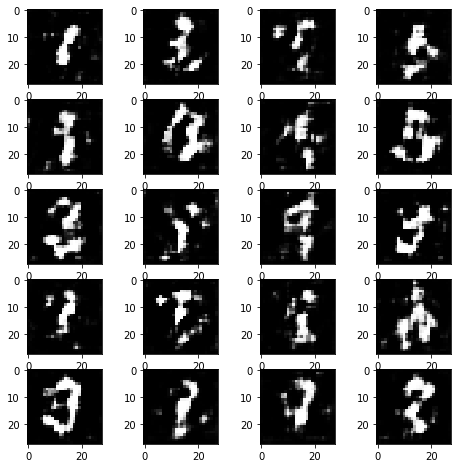

In [76]:
# Generating images with GAN
w=10
h=10
fig=plt.figure(figsize=(8, 8))
columns = 4
rows = 5
for i in range(1, columns*rows +1):
    img = generator.predict(np.random.normal(0, 1, (1, 100)))
    fig.add_subplot(rows, columns, i)
    plt.imshow(img[0].reshape(28, 28), cmap='gray')
plt.show()

## AutoEncoders

<img src=https://i.ibb.co/8PYwxbB/autoencoder.png>

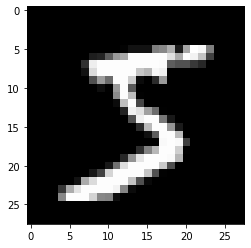

In [77]:
# Load data
(X_train, y_train),(X_test, y_test) = mnist.load_data()
plt.imshow(X_train[0], cmap="gray")

In [78]:
# Preprocess data
X_train = X_train / 255.
X_test = X_test / 255.

In [84]:
# Generate noise dataset
noise_factor=0.3
noise_dataset=[]

for img in X_train:
    noisy_image = img + noise_factor * np.random.randn(*img.shape)
    noisy_image = np.clip(noisy_image, 0., 1.)
    noise_dataset.append(noisy_image)
    

In [85]:
noise_dataset = np.array(noise_dataset)
noise_dataset.shape

(60000, 28, 28)

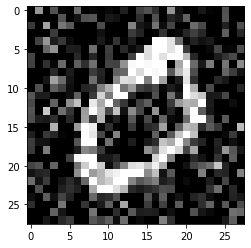

In [86]:
plt.imshow(noise_dataset[1], cmap="gray")

In [87]:
noise_test_set = []
for img in X_test:
    noisy_image = img + noise_factor * np.random.randn(*img.shape)
    noisy_image = np.clip(noisy_image, 0., 1.)
    noise_test_set.append(noisy_image)
    
    
noise_test_set = np.array(noise_test_set)
noise_test_set.shape

(10000, 28, 28)

In [88]:
# Define AutoEncoder
model = tf.keras.models.Sequential()
#Encoder
model.add(tf.keras.layers.Conv2D(filters=16, kernel_size=3, strides=2, padding="same", input_shape=(28, 28, 1)))
model.add(tf.keras.layers.Conv2D(filters=8, kernel_size=3, strides=2, padding="same"))
#Encoded image
model.add(tf.keras.layers.Conv2D(filters=8, kernel_size=3, strides=1, padding="same"))
#Decoder
model.add(tf.keras.layers.Conv2DTranspose(filters=16, kernel_size=3, strides=2, padding="same"))
model.add(tf.keras.layers.Conv2DTranspose(filters=1, kernel_size=3, strides=2, activation='sigmoid', padding="same"))
model.compile(loss='binary_crossentropy', optimizer=tf.keras.optimizers.Adam(lr=0.001))
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_240 (Conv2D)          (None, 14, 14, 16)        160       
_________________________________________________________________
conv2d_241 (Conv2D)          (None, 7, 7, 8)           1160      
_________________________________________________________________
conv2d_242 (Conv2D)          (None, 7, 7, 8)           584       
_________________________________________________________________
conv2d_transpose (Conv2DTran (None, 14, 14, 16)        1168      
_________________________________________________________________
conv2d_transpose_1 (Conv2DTr (None, 28, 28, 1)         145       
Total params: 3,217
Trainable params: 3,217
Non-trainable params: 0
_________________________________________________________________


In [89]:
# Train AutoEncoder
model.fit(noise_dataset.reshape(-1, 28, 28, 1), 
          X_train.reshape(-1, 28, 28, 1), 
          epochs=50, 
          batch_size=200, 
          validation_data=(noise_test_set.reshape(-1, 28, 28, 1), X_test.reshape(-1, 28, 28, 1)))

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 8s 136us/sample - loss: 0.2520 - val_loss: 0.1107
Epoch 2/50
60000/60000 [==============================] - 7s 122us/sample - loss: 0.1029 - val_loss: 0.0955
Epoch 3/50
60000/60000 [==============================] - 7s 117us/sample - loss: 0.0946 - val_loss: 0.0918
Epoch 4/50
60000/60000 [==============================] - 7s 112us/sample - loss: 0.0922 - val_loss: 0.0903
Epoch 5/50
60000/60000 [==============================] - 8s 126us/sample - loss: 0.0909 - val_loss: 0.0893
Epoch 6/50
60000/60000 [==============================] - 8s 129us/sample - loss: 0.0899 - val_loss: 0.0884
Epoch 7/50
60000/60000 [==============================] - 8s 125us/sample - loss: 0.0891 - val_loss: 0.0877
Epoch 8/50
60000/60000 [==============================] - 7s 112us/sample - loss: 0.0885 - val_loss: 0.0872
Epoch 9/50
60000/60000 [==============================] - 7s 119us/sample - loss: 0.08

In [90]:
# Predict image
predicted = model.predict(noise_test_set[:10].reshape(-1, 28, 28, 1))
predicted.shape

(10, 28, 28, 1)

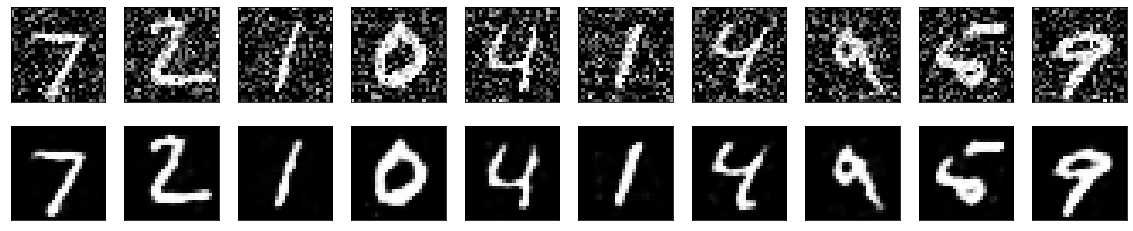

In [91]:
# Visualize result
fig, axes = plt.subplots(nrows=2, ncols=10, sharex=True, sharey=True, figsize=(20,4))
for images, row in zip([noise_test_set[:10], predicted], axes):
    for img, ax in zip(images, row):
        ax.imshow(img.reshape((28, 28)), cmap='Greys_r')
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)